# 업 샘플링

In [1]:
# 라이브러리 로드
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.utils import resample


In [2]:
# 데이터 로딩
df = pd.read_csv('./concat.csv', encoding='utf-8')

In [3]:
df

일시  WIND_SPEED  GUST_WIND  SIG_WAVE  MAX_WAVE     HPA  \
0      2011-03-04 17:00:00         2.8        8.9       0.3       0.5  1021.0   
1      2011-03-04 18:00:00         3.4        8.9       0.3       0.4  1021.7   
2      2011-03-04 19:00:00         4.5        8.9       0.3       0.4  1022.2   
3      2011-03-04 20:00:00         2.9        8.9       0.3       0.5  1022.6   
4      2011-03-04 21:00:00         3.8        8.9       0.3       0.5  1023.1   
...                    ...         ...        ...       ...       ...     ...   
76354  2020-12-30 20:00:00        14.4       19.5       2.0       3.1  1018.9   
76355  2020-12-30 21:00:00        13.0       20.6       2.0       3.5  1020.4   
76356  2020-12-30 22:00:00        10.7       16.3       2.0       3.4  1021.3   
76357  2020-12-30 23:00:00        13.9       20.4       2.3       3.8  1021.5   
76358  2020-12-31 00:00:00        10.0       14.9       2.0       2.9  1022.5   

       특보강도  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
...     ...  
76354   1.0  
76355   1.0  
76356   1.0  
76357   1.0  
76358   1.0  

[76359 rows x 7 columns]

0.0    69488
1.0     6871
Name: 특보강도, dtype: int64


<AxesSubplot: ylabel='Type'>

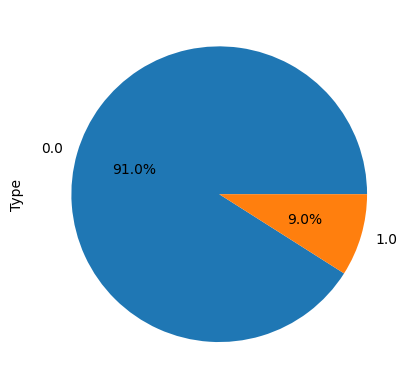

In [4]:
print(df["특보강도"].value_counts())

df.groupby('특보강도').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [5]:
# 데이터셋 나누기
df_zero = df[df["특보강도"] == 0]
df_one = df[df["특보강도"] == 1]
print(df_zero.shape)
print(df_one.shape)


(69488, 7)
(6871, 7)


In [8]:
# up sampling
df_upsample = resample(df_one,
             replace=True,
             n_samples=len(df_zero),
             random_state=42)

print(df_upsample.shape)

(69488, 7)


* up sampling

1.0    69488
0.0    69488
Name: 특보강도, dtype: int64


<AxesSubplot: ylabel='Type'>

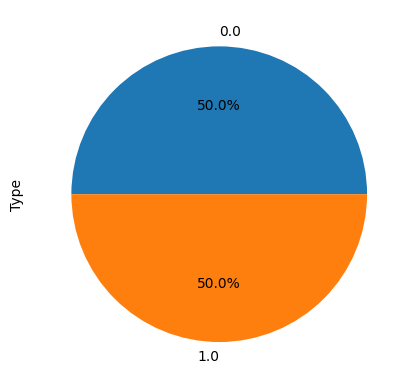

In [11]:
data_upsampled = pd.concat([df_upsample, df_zero])

print(data_upsampled["특보강도"].value_counts())

data_upsampled.groupby('특보강도').size().plot(kind='pie',
                                       y = "특보강도",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [16]:
data_upsampled

일시  WIND_SPEED  GUST_WIND  SIG_WAVE  MAX_WAVE     HPA  \
6062   2012-04-21 18:00:00         5.5       12.7       1.1       1.7  1007.0   
58667  2018-08-17 07:00:00        10.6       15.2       0.7       1.1  1012.9   
57097  2018-06-10 12:00:00         6.5       15.2       0.8       1.2  1005.4   
56627  2018-05-20 12:00:00        10.7       18.8       0.8       1.1  1019.9   
36521  2015-11-25 09:00:00         6.4       13.3       0.9       1.4  1019.2   
...                    ...         ...        ...       ...       ...     ...   
76332  2020-12-29 22:00:00        12.5       15.9       1.0       1.7  1013.4   
76333  2020-12-29 23:00:00        13.3       17.3       1.1       1.6  1013.1   
76334  2020-12-30 00:00:00        13.6       16.8       1.1       1.8  1013.5   
76335  2020-12-30 01:00:00        12.3       15.8       1.1       1.8  1014.1   
76336  2020-12-30 02:00:00         9.3       13.1       1.2       1.7  1014.0   

       특보강도  
6062    1.0  
58667   1.0  
57097   1.0  
56627   1.0  
36521   1.0  
...     ...  
76332   0.0  
76333   0.0  
76334   0.0  
76335   0.0  
76336   0.0  

[138976 rows x 7 columns]

In [13]:
# df[컬럼명].value_counts()
data_upsampled['특보강도'].value_counts()

1.0    69488
0.0    69488
Name: 특보강도, dtype: int64

In [17]:
# obj -> datetime
data_upsampled['일시'] = pd.to_datetime(data_upsampled['일시'])
data_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138976 entries, 6062 to 76336
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   일시          138976 non-null  datetime64[ns]
 1   WIND_SPEED  138976 non-null  float64       
 2   GUST_WIND   138976 non-null  float64       
 3   SIG_WAVE    138976 non-null  float64       
 4   MAX_WAVE    138976 non-null  float64       
 5   HPA         138976 non-null  float64       
 6   특보강도        138976 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 8.5 MB


In [18]:
# 인덱스
data_upsampled = data_upsampled.set_index('일시')
data_upsampled

WIND_SPEED  GUST_WIND  SIG_WAVE  MAX_WAVE     HPA  특보강도
일시                                                                          
2012-04-21 18:00:00         5.5       12.7       1.1       1.7  1007.0   1.0
2018-08-17 07:00:00        10.6       15.2       0.7       1.1  1012.9   1.0
2018-06-10 12:00:00         6.5       15.2       0.8       1.2  1005.4   1.0
2018-05-20 12:00:00        10.7       18.8       0.8       1.1  1019.9   1.0
2015-11-25 09:00:00         6.4       13.3       0.9       1.4  1019.2   1.0
...                         ...        ...       ...       ...     ...   ...
2020-12-29 22:00:00        12.5       15.9       1.0       1.7  1013.4   0.0
2020-12-29 23:00:00        13.3       17.3       1.1       1.6  1013.1   0.0
2020-12-30 00:00:00        13.6       16.8       1.1       1.8  1013.5   0.0
2020-12-30 01:00:00        12.3       15.8       1.1       1.8  1014.1   0.0
2020-12-30 02:00:00         9.3       13.1       1.2       1.7  1014.0   0.0

[138976 rows x 6 columns]

In [20]:
data_upsampled.to_csv('up_sampling.csv')

## 종합코드

In [ ]:
# 라이브러리 로드
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.utils import resample

# 데이터 로딩
df = pd.read_csv('./concat.csv', encoding='utf-8')

# 1차 plot
print(df["특보강도"].value_counts())

df.groupby('특보강도').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')

# 데이터셋 나누기
df_zero = df[df["특보강도"] == 0]
df_one = df[df["특보강도"] == 1]
print(df_zero.shape)
print(df_one.shape)

# up sampling
df_upsample = resample(df_one,
             replace=True,
             n_samples=len(df_zero),
             random_state=42)

print(df_upsample.shape)

# 2차 plot
data_upsampled = pd.concat([df_upsample, df_zero])

print(data_upsampled["특보강도"].value_counts())

data_upsampled.groupby('특보강도').size().plot(kind='pie',
                                       y = "특보강도",
                                       label = "Type",
                                       autopct='%1.1f%%')

# df[컬럼명].value_counts()
data_upsampled['특보강도'].value_counts()

# obj -> datetime
data_upsampled['일시'] = pd.to_datetime(data_upsampled['일시'])
data_upsampled.info()

# 인덱스
data_upsampled = data_upsampled.set_index('일시')
data_upsampled

# 저장
data_upsampled.to_csv('up_sampling.csv')